# Facial Expression Recognition Challenge

## Kaggle competition in 2013. 

###  48 * 48 의 픽셀사이즈로 이루어진 grayscale의 얼굴사진 데이터셋
 
 1. 자동등록(프로그램에 의한)된 사진들로 이루어져 있어, 얼굴이 중심에 잘 와있지도, 얼굴면적이 비슷하지도 않음.
 2. 표정은 (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)의 7가지로 구분되어 라벨되어있음
 3. 28,709개의 트레니인 세트, 3589개의 public test set와 최종 competition에 쓰인 3589개의 private test set으로 구성
 
 ###### Pierre-Luc Carrier 와 Aron Courville의 자신의 프로젝트의 일환인 데이터 셋을 제공!!


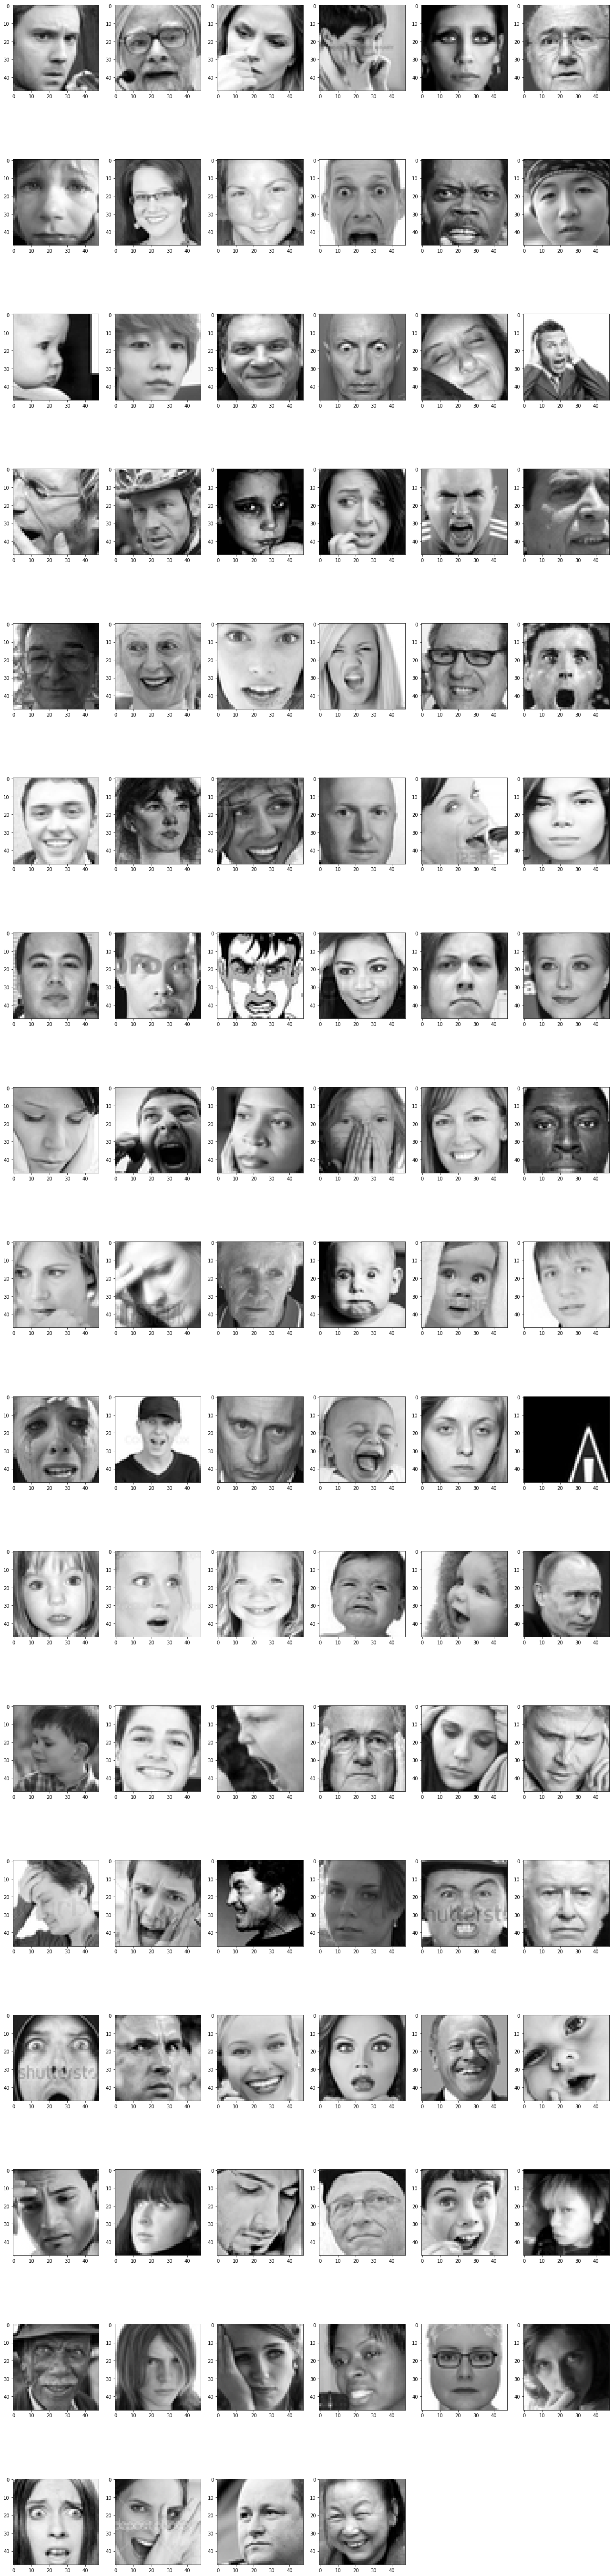

In [7]:
from IPython.display import Image
Image("pictures_r.png")

# 선택의 이유, 목표.

잘 만들어진 데이터셋, 그러나 결함이 있고 향상 가능성이 있는 데이터셋을 고름.(직접 데이터셋 만드는 것은 어려우리라 판단.

4년전을 기준으로 약 71.16% 가 1위, 2위는 69.26%, 3위는 68.82% 등으로 나타났는데 이것을 넘어서는 모델을 재현하고, 다양한 모델의 변형이 예측결과에 미치는 영향에 대해서 정리를 해보려 함.

## 데이터셋 문제점. 

1. 데이터 제공자가 이미 주지했듯 얼굴이 중심에 맞지 않고 얼굴 크기가 제각각(잘려있기까지함)
2. 정면을 바라보지 않고 다양한 각도로 틀어져 있는 얼굴사진들. 
3. 워터마크가 껴있거나 손으로 얼굴을 가리고 있어 표정 인지하는데 장애가됨.
4. 사람의 얼굴이 아닌 인형이나 만화케릭터의 얼굴이 들어가 있거나 no image 라는 warning이 떠잇는 사진이 껴있음
5. 각 표정별 데이터의 갯수가 균일하지 않음. 특히 Disgusting 표정의 수가 많이 부족함(28000개중 170개에 불과)


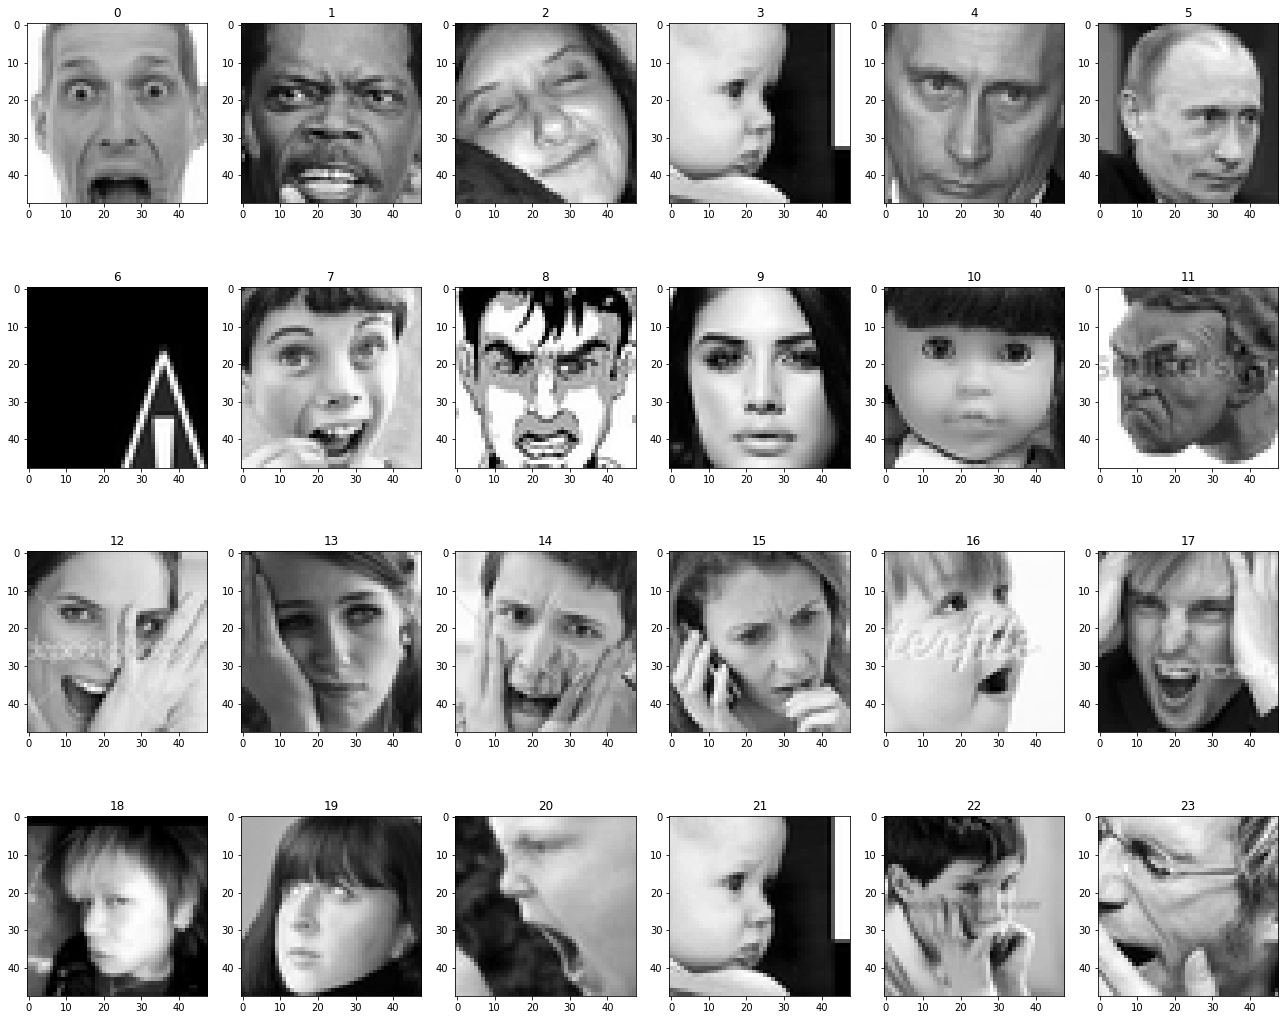

In [8]:
Image("pictures_f.png")

## 전처리를 시도하기 전에 데이터를 CNN으로 learning 시켜 보았다. 

(False 결과를 나타낸 그림들만 살펴본 그래프 추가)

1. 잘려있는 그림들에 대해서도 심각하게 잘려있는 경우가 아닌경우 잘 맞춘다. 
2. 정면을 바라 보지 않는 경우는 못맞추리라 생각했으나 의외로 잘 맞춘다!!
3. 약간의 워터마크나, 살짝 손으로 가린 경우는 맞추는데 큰 문제가 되지 않는다. 

4. no image라 표현된 그림들은 확실히 제거해 주는것이 도움이 될듯하다. 만화케릭터는 잘 맞추지 못한다.
5. 갯수가 적은 disgusting의 경우 잘 맞추지 못하는 경향이 보인다!! (다양한 모델로 돌려보았을때도) 



## 전처리로서 시도한 부분들

1. no image가 뜬 부분을 제거한다. 
2. disgusting에 해당하는 그림을 각도를 돌린 사진들을 이용해서 갯수를 늘려준다. 

+a 로 시도
3. 얼굴에 있는 randmark부분을 인식시켜서 그 데이터들을 중심으로 학습 시킨다. 
4. 데이터에서 경계면에 해당하는 선만을 인식시킨 사진을 만들어서 학습시켜본다.

# 어떻게 하면 향상 시킬수 있을 것인가?!!! 

1. 논문등 후속적으로 좋은 결과를 나타낸 것들을 follow up
2. 여러개의 pipeline을 만들어서 분류 결과를 좋게 마들기 위한 시도를 함.
3. 엑티베이션함수, hidden layer 갯수, neuron 갯수나 convolution 하는 필터의 크기등을 바꾸어 가면서 결과가 바뀌는 것을 데이터로 출력후 각각의 영향력의 정도를 추적.